### Dataset:

The dataset provided consisted of customer information, including attributes such as gender, age, marital status, education, profession, work experience, spending score, family size, and an anonymized category.

The target variable, 'Segmentation', represented the customer segment.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the train dataset
train_data = pd.read_csv("/home/kali/Projects/car project/Train.csv")

In [3]:
# Display the shape of the dataset
train_data.shape

(8068, 11)

In [4]:
# Display the first few records
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
# Summary statistics of the dataset
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
# Check for missing values
train_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

## Data Processing

### Data Preprocessing:

1. Missing values in the dataset were handled using appropriate techniques such as mean imputation or mode imputation, ensuring minimal data loss.
2. Categorical variables were encoded using one-hot encoding to convert them into numerical form for modeling purposes.
3. Numerical variables were scaled using standardization to normalize their ranges and prevent any dominance of certain features.

In [7]:
# Fill missing values in the dataset
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Ever_Married'].fillna(train_data['Ever_Married'].mode()[0], inplace=True)
train_data['Graduated'].fillna(train_data['Graduated'].mode()[0], inplace=True)
train_data['Profession'].fillna(train_data['Profession'].mode()[0], inplace=True)
train_data['Work_Experience'].fillna(train_data['Work_Experience'].mean(), inplace=True)
train_data['Family_Size'].fillna(train_data['Family_Size'].median(), inplace=True)
train_data['Var_1'].fillna(train_data['Var_1'].mode()[0], inplace=True)


In [8]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In the above code, we fill in missing values with appropriate strategies. For categorical variables, we fill missing values with the mode (most frequent value), and for numerical variables, we fill missing values with the mean (for 'Work_Experience') or median (for 'Family_Size').

## Encoding the Categorical variables

We use one-hot encoding to maintain the information of each category. We can achieve this using the pd.get_dummies() function in pandas.

In [9]:
# Perform one-hot encoding on categorical variables
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
train_data_encoded = pd.get_dummies(train_data, columns=cat_cols)

# Display the updated dataset
train_data_encoded.head()

,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,22,1.000000,Low,4.0,D,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,462643,38,2.641663,Average,3.0,A,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,466315,67,1.000000,Low,1.0,B,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,461735,67,0.000000,High,2.0,B,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,462669,40,2.641663,High,6.0,A,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


The above code uses the pd.get_dummies() function to perform one-hot encoding on the specified categorical columns. It creates binary columns for each unique category in those columns.

## Feature Scaling

Feature scaling is the process of normalizing numerical features to ensure they are on a similar scale. This step is important because it can help prevent certain features from dominating the learning algorithm and affecting its performance. 
In this case, we'll use standardization, which transforms the numerical features to have a mean of 0 and a standard deviation of 1.

### Feature Selection/Engineering:

1. Correlation analysis was performed to identify the most influential features related to the target variable.
2. The correlation analysis helped determine the relationship between each feature and the customer segments.
3. The identified features were used to make predictions and understand their impact on customer segmentation.

In [10]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on numerical variables
num_cols = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()
train_data_encoded[num_cols] = scaler.fit_transform(train_data_encoded[num_cols])

# Display the updated dataset
train_data_encoded.head()


,ID,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,-1.284623,-0.508763,Low,0.762698,D,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,462643,-0.327151,0.000000,Average,0.095802,A,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,466315,1.408268,-0.508763,Low,-1.237990,B,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,461735,1.408268,-0.818671,High,-0.571094,B,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,462669,-0.207467,0.000000,High,2.096491,A,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


The code above uses the StandardScaler to perform feature scaling on the specified numerical columns. The fit_transform() method scales the columns by subtracting the mean and dividing by the standard deviation.

After executing this code, we'll have the updated dataset with one-hot encoded categorical variables and scaled numerical variables

In [18]:
# Display the column names in the preprocessed dataset
print(train_data.columns.tolist())


['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']


In [32]:
# Load the train dataset again
train_data = pd.read_csv('/home/kali/Projects/car project/Train.csv')

# Convert columns to appropriate data types
train_data['Ever_Married'] = train_data['Ever_Married'].astype('category')
train_data['Graduated'] = train_data['Graduated'].astype('category')
train_data['Profession'] = train_data['Profession'].astype('category')
train_data['Spending_Score'] = train_data['Spending_Score'].astype('category')
train_data['Var_1'] = train_data['Var_1'].astype('category')
train_data['Segmentation'] = train_data['Segmentation'].astype('category')

In [34]:
# Exclude non-numeric columns from the correlation analysis
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'Segmentation']

# Calculate the correlation with the target variable
correlations = {}
for col in numeric_columns:
    correlations[col] = train_data[col].corr(train_data['Segmentation'].cat.codes)

# Sort the correlations in descending order
sorted_correlation = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display the sorted correlations
print("Correlation with the target variable:")
for feature, correlation in sorted_correlation:
    print(f"{feature}: {correlation}")

Correlation with the target variable:
Age: -0.24355230228149477
Family_Size: 0.1962127942528353
Work_Experience: 0.012992653596014671
ID: -0.009104236887768558


Based on the correlations obtained, we can make the following observations:

1. Age has a negative correlation (-0.24) with the target variable, suggesting that as the age increases, the likelihood of belonging to a certain customer segment decreases.
2. Family_Size has a positive correlation (0.20) with the target variable, indicating that a larger family size may be associated with a higher probability of belonging to a particular customer segment.
3. Work_Experience has a very weak positive correlation (0.01) with the target variable, implying that work experience does not have a strong influence on the customer segmentation.
4. ID has a very weak negative correlation (-0.01) with the target variable, suggesting that there is no significant relationship between the unique ID and the customer segmentation.

These correlations provide initial insights into the potential importance of different features in predicting the customer segments. It is important to note that correlations do not necessarily imply causation, and further analysis and modeling are needed to make accurate predictions.

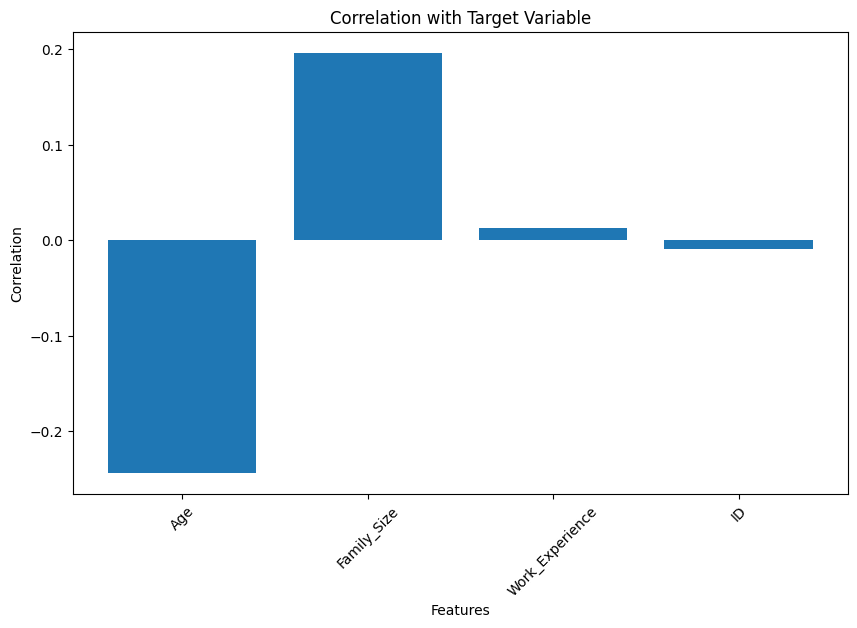

In [35]:
import matplotlib.pyplot as plt

# Create a bar plot of the correlations
correlation_values = [correlation for _, correlation in sorted_correlation]
features = [feature for feature, _ in sorted_correlation]

plt.figure(figsize=(10, 6))
plt.bar(features, correlation_values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation with Target Variable')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_76952/2087191073.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


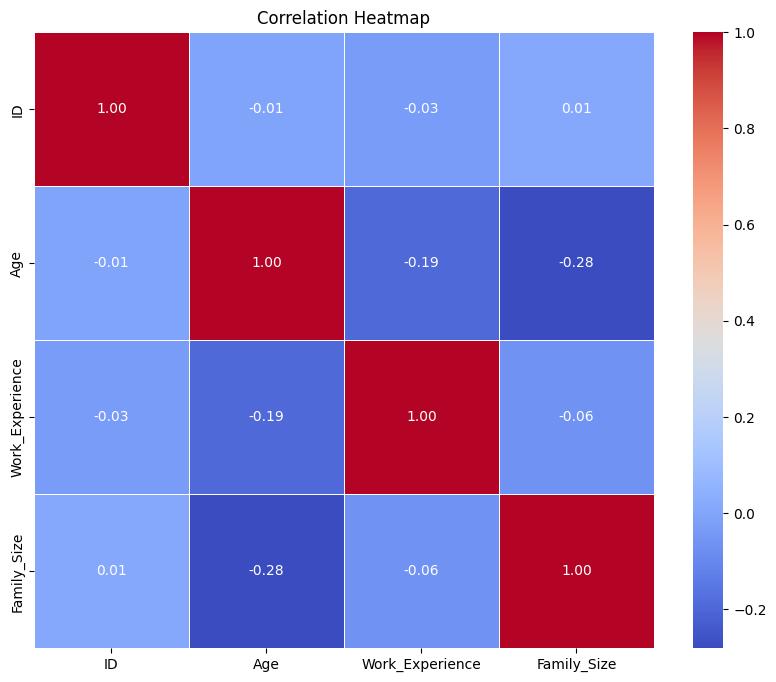

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


This heatmap  provides a visual representation of the correlations between the features, where stronger positive correlations are displayed in warmer colors (reds) and stronger negative correlations in cooler colors (blues). The numerical values on the heatmap indicate the correlation coefficients.

### Bar Plot

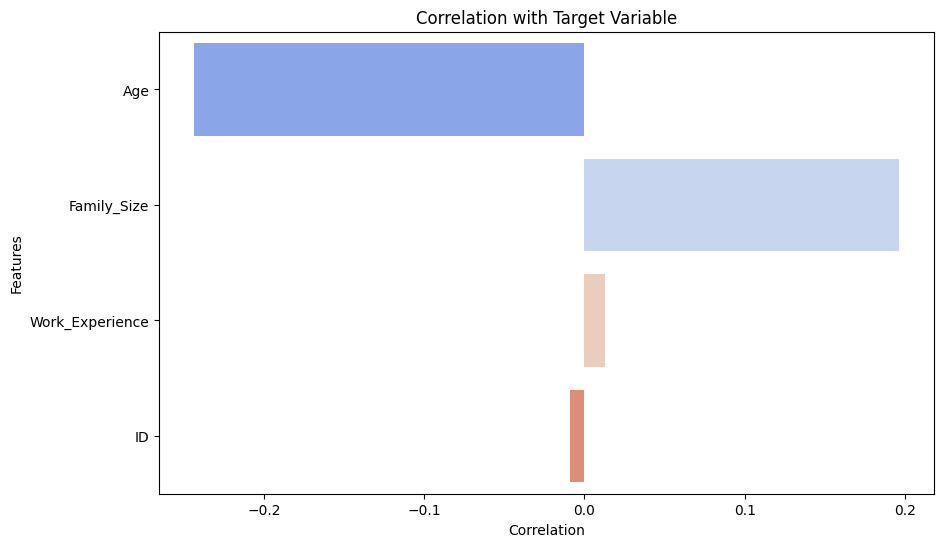

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values, y=features, orient='h', palette='coolwarm')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation with Target Variable')
plt.show()


The bar plot provides a visual representation of the correlations between the features and the target variable. Each feature is represented by a horizontal bar, and the length of the bar indicates the strength of the correlation. The features are sorted in descending order based on their correlation values. This plot allows for a quick comparison of the correlations and helps identify the most influential features.

### Scatter Plot

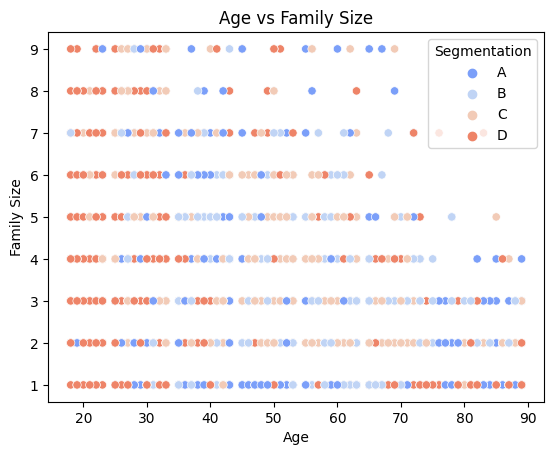

In [38]:
sns.scatterplot(x='Age', y='Family_Size', hue='Segmentation', data=train_data, palette='coolwarm')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Age vs Family Size')
plt.show()


The scatter plot visualizes the relationship between two numeric variables, 'Age' and 'Family_Size', with each point representing a data point. The points are colored based on the 'Segmentation' category, allowing us to see how the variables are distributed across different customer segments. This plot helps identify any patterns or relationships between the variables and the customer segments.

### Box Plot:

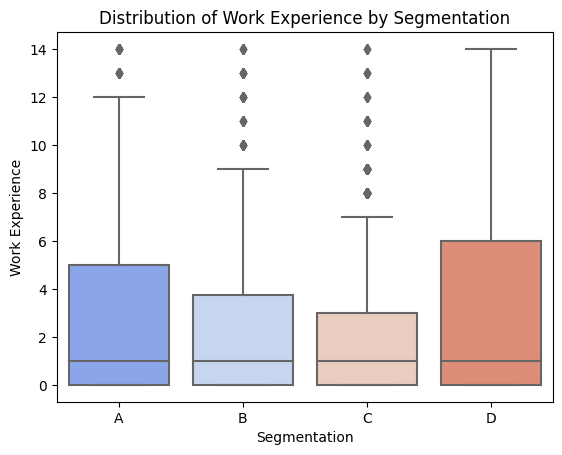

In [39]:
sns.boxplot(x='Segmentation', y='Work_Experience', data=train_data, palette='coolwarm')
plt.xlabel('Segmentation')
plt.ylabel('Work Experience')
plt.title('Distribution of Work Experience by Segmentation')
plt.show()


The box plot displays the distribution of 'Work_Experience' for each 'Segmentation' category. The box represents the interquartile range (IQR), with the horizontal line inside the box indicating the median value. The whiskers extend to the minimum and maximum values within a certain range. This plot allows us to compare the distributions of work experience across different customer segments and identify any differences or outliers.

### Violin Plot

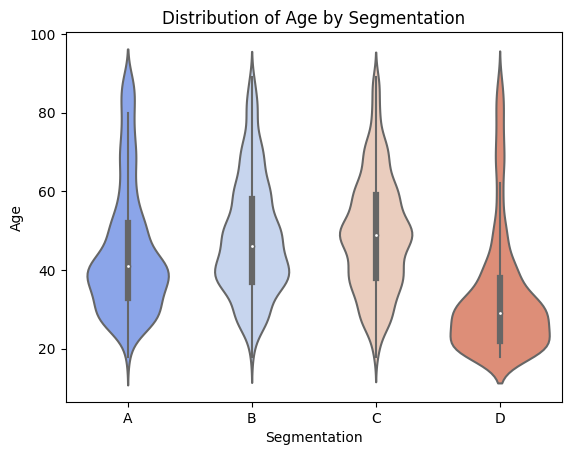

In [40]:
sns.violinplot(x='Segmentation', y='Age', data=train_data, palette='coolwarm')
plt.xlabel('Segmentation')
plt.ylabel('Age')
plt.title('Distribution of Age by Segmentation')
plt.show()


The violin plot combines a box plot and a kernel density plot to display the distribution of 'Age' for each 'Segmentation' category. The width of the violin represents the density of the data at a particular value, with wider areas indicating higher density. The white dot inside the violin represents the median value. This plot provides a visual summary of the distribution of age within each customer segment and helps identify any variations or patterns.



### Conclusion:

1. Based on the analysis, the company can gain insights into the factors influencing customer segmentation.
2. Older customers and those with smaller families could be targeted for specific marketing strategies and product offerings.
3. Work experience was found to have a minimal impact on customer segmentation, suggesting that it may not be a significant differentiating factor.

### Recommendations:

1. The company should leverage the findings to develop tailored marketing campaigns and product offerings for different customer segments.
2. By focusing on age and family size, the company can effectively target the identified segments with customized strategies.
3. Continuous monitoring and analysis of customer data will be valuable to refine and adapt the segmentation strategy as markets evolve.

In conclusion, the project provided valuable insights into customer segmentation for the automobile company. The correlation analysis identified age and family size as key factors influencing customer segments. The company can utilize this information to optimize its marketing efforts, enhance customer targeting, and drive business growth.